![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Regressão generalizada

O modelo de regressão pode ser generalizado para encontrar os coeficientes de $n$ funções $f_i$
para aproximar, o melhor possível, os valores $y_j$ observados em $m$ pontos $t_j$.

## Questão 1: Calculando a regressão

Abaixo, dê uma função que calcula a matriz do sistema linear e, em seguida,
a que usa esta matriz para calcular os parâmetros do modelo -
neste caso, os coeficientes multiplicando cada uma das $f_i$'s.

In [2]:
def model_M(ts,fs):
    """
    Constrói a matriz M = [[f1(t1), f2(t1), ...],
                           [f1(t2), f2(t2), ...],
                           [f1(t3), f2(t3), ...],
                           ...
                          ] (array)
    correspondente ao sistema  y_j = \sum a_i f_i(t_j)
    """
    M = []
    for t in ts:
            M += [[f(t) for f in fs]]
    return np.array(M)

def model_par(ts,ys,fs):
    """
    Calcula os coeficientes  a_i  que minimizam o erro quadrático do sistema  y_j = \sum a_i f_i(t_j)
    """
    M = model_M(ts,fs)
    coefs, *_ = np.linalg.lstsq(M,ys,rcond=None)
    return coefs

In [3]:
def make_sin(n):
    def f(x):
        return np.sin(n*x)
    return f

def make_cos(n):
    def f(x):
        return np.cos(n*x)
    return f

In [4]:
fs = [make_sin(2), make_cos(3), make_cos(4)]
ts = np.arange(10)
M = model_M(ts, fs)
n, m = np.shape(M)
assert n == len(ts)
assert m == len(fs)

In [5]:
fs = [np.exp, np.log, np.tan, np.sin]
ts = np.arange(4,20)
M = model_M(ts, fs)

assert M[3,1] == np.log(7)
assert M[6,2] == np.tan(10)

In [6]:
np.random.seed(1)
ys = np.random.randn(16)
coefs = model_par(ts, ys, fs)
assert len(coefs) == len(fs)

In [7]:
coefs = model_par(ts, ys, fs)
assert np.isclose(coefs[0], 0)
assert np.abs(coefs[3] + 0.5) < 0.1

# Regressão com erro de observação

Uma das grandes vantagens da regressão é poder "limpar" os erros de observação.
Mas, é claro, isso só é possível quando temos "bem mais" observações do que funções na base.

Nesta parte, veremos como isso acontece para uma função curiosa:

In [8]:
def func(x):
    return 2**np.sin(2*x) - np.exp(np.cos(3*x))

Agora, vamos construir nossos "dados de ajuste" (com erros):

In [9]:
a = 0
b = 2*np.pi

N = 19
xs = np.linspace(a,b,N)
ys = func(xs)
np.random.seed(2)
errs = np.random.normal(scale=0.5,size=N)
ys += errs

## Questão 2: Explorando os dados

Faça um gráfico tanto da função `func` como dos dados,
no intervalo considerado.

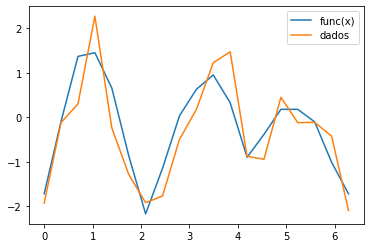

In [10]:
plt.plot(xs, func(xs), label="func(x)")
plt.plot(xs, ys, label="dados")
plt.legend()
ax = plt.gca()

In [11]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [12]:
for l in ax.lines:
    xgraph = l.get_xdata()
    assert min(xgraph) == 0
    assert max(xgraph) == 2*np.pi

In [13]:
ax = None

## Questão 3: Interpolando e observando

Agora, calcule o ajuste "interpolador" destes dados, com senos e cossenos,
e faça um gráfico com a função original, os dados e a função interpoladora.

Lembre-se: para interpolar os dados, é necessário ter o mesmo número de funções na base
do que pontos para interpolar.


Dica: use as funções `make_sin` e `make_cos` para criar uma lista de funções `fs`.

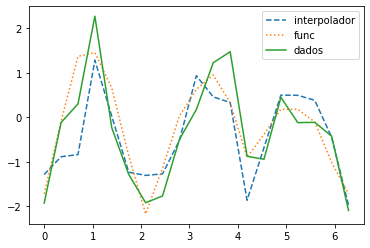

In [14]:

N = 19

xs = np.linspace(a,b,N)
ys = func(xs)
np.random.seed(2)
errs = np.random.normal(scale=0.5,size=N)
ys += errs

fs = [lambda x: x*]

for i in range(N-1):
    if i%2:
        fs.append(make_sin(i+2))
    else:
        fs.append(make_cos(i+3))

coefs = model_par(xs,ys,fs)

def pol(x):
    poli = []
    ind = 0
    for i in coefs:
        poli.append(i*fs[ind](x))
        ind +=1
    return np.sum(poli)

pol = np.vectorize(pol)

plt.plot(xs, pol(xs), "--", label="interpolador")
plt.plot(xs, func(xs), ":",label="func")
plt.plot(xs, ys, label="dados")
plt.legend()
ax = plt.gca()

In [15]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3

for l in ax.lines:
    xgraph = l.get_xdata()
    assert min(xgraph) == 0
    assert max(xgraph) == 2*np.pi

O que você observa neste gráfico?

O interpolador ficou bem aproximado dos dados, sem erros tão grandes.

In [16]:
ax = None

Faça, agora, um gráfico do valor absoluto ("amplitude") dos coeficientes de cada função.

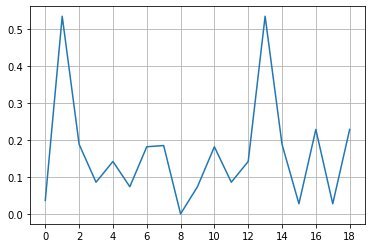

In [17]:

plt.plot(range(len(coefs)), abs(coefs))
plt.xticks(np.arange(0,19,2))
plt.grid()
ax = plt.gca()

O que você percebe?

Os módulos no geral são bem grandes, exceto dois que estão próximos de 1. 

Quais as funções que correspondem às maiores amplitudes?

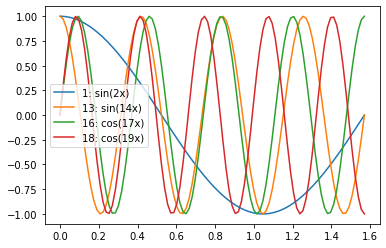

In [18]:
index = [1,13,16,18]
fs2 = []
for i in index:
    if i%2:
        fs2.append(make_sin(i+2))
    else:
        fs2.append(make_cos(i+3))
def f(x):
    if x%2:
        return f"sin({x+1}x)"
    else: 
        return f"cos({x+1}x)"
xs = np.linspace(0, np.pi/2, 100)
for i in index:
    plt.plot(xs, fs[i](xs), label=f"{i}: {f(i)}")

plt.legend();

## Questão 4: Coeficientes principais

Agora que vimos que algumas funções parecem mais importantes do que outras,
selecione apenas as que correspondem aos 3 maiores coeficientes,
e **recalcule** o ajuste, usando apenas estas três.
Você terá uma regressão, já que temos menos funções na base do que pontos ("dados").

In [53]:
 def F3(x):
    
    xs = np.linspace(0,2*np.pi, 19)

    fs = []
    index = [1,13,18]
    for i in index:
        if i%2:
            fs.append(make_sin(i+2))
        else:
            fs.append(make_cos(i+3))
    coefs = model_par(xs,ys,fs)
    def pol(x):
        poli = 0
        ind = 0
        for i in coefs:
            poli += i*fs[ind](x)
            ind +=1
        return poli
    return pol(x)


In [54]:
assert np.isclose(F3(0), -1.1243170678683723), (F3(0))

In [55]:
assert np.isclose(F3(np.pi/2), -0.37679705173515127), (F3(np.pi/2))

AssertionError: -4.055973102343308e-15

Faça o gráfico da função correspondente aos 3 maiores coeficientes da interpolação,
e compare com a função original `func` e sua interpolação.

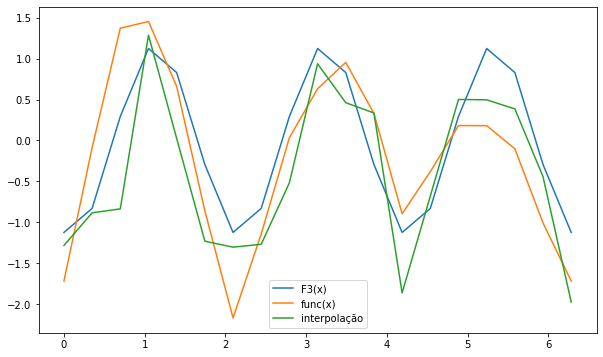

In [56]:
plt.figure(figsize=(10,6))

a = 0
b = 2*np.pi
N = 19
xs = np.linspace(a,b,N)
plt.plot(xs, F3(xs), label="F3(x)")
plt.plot(xs, func(xs), label="func(x)")
plt.plot(xs, pol(xs), label="interpolação")
plt.legend()
ax=plt.gca()

In [57]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3

In [58]:
ax = None

Qual ajuste parece melhor?  Porquê?

A interpolação, pois os vales e picos estão mais próximos, em comparação à F3(x)

## Questão 5: Erros

Para observar como o erro evolui ao incluirmos mais pontos,
vamos recalcular o ajuste para todos os valores de $n$, de 1 a 19,
e observar o erro quadrático médio no intervalo (refinado!).

Ao recalcular, escolha as funções em ordem decrescente
do valor absoluto do coeficiente encontrado pela interpolação.

Para auxiliar, construa a função `best_reg(fs,xs,ys,n)`,
que retorna a função dada pela regressão usando as $n$ funções com os maiores coeficientes.
(Para evitar variáveis globais, você pode primeiro calcular a interpolação,
para descobrir os maiores coeficientes, e daí escolher as funções para a regressão
e calcular de novo)

In [22]:
def best_reg(fs, xs, ys, n):
    """Melhor regressor a partir da base `fs`, baseado nos $n$ maiores coeficientes da interpolação."""
   
    N = 19

    xs = np.linspace(a,b,N)
    ys = func(xs)
    np.random.seed(2)
    errs = np.random.normal(scale=0.5,size=N)
    ys += errs

    fs = [lambda x: x*3]

    for i in range(N-1):
        if i%2:
            fs.append(make_sin(i+2))
        else:
            fs.append(make_cos(i+3))

    coefs = abs(model_par(xs,ys,fs))
    coefs_ord = np.sort(coefs)[::-1]

    i_coefs_ord = []
    for c in coefs_ord:
        i_coefs_ord.append(list(coefs).index(c))

    fs_ord = []
    for i_fs_ord in i_coefs_ord:
        fs_ord.append(fs[i_fs_ord])
    
    fs_ord = fs_ord[:n]

    coefs = model_par(xs,ys,fs_ord)
    def pol(x):
        poli = []
        ind = 0
        for i in coefs:
            poli.append(i*fs_ord[ind](x))
            ind +=1
        return np.sum(poli)
    pol = np.vectorize(pol)
    
    return pol

In [23]:
F1 = best_reg(fs, xs, ys, n=1)
assert np.abs(F1(2) + 1) < 0.1, (F1(2))

In [27]:
F10 = best_reg(fs, xs, ys, n=10)
assert F10(1) > 2, F10(1)

AssertionError: -15756552120730.81

In [30]:
F2 = best_reg(fs, xs, ys, n=2)
assert np.isclose(F2(2), -1.732407192511482)

AssertionError: 

In [62]:
def midpoint(f,a,b,n=100):
    ts,h = np.linspace(a,b,n, endpoint=False, retstep=True)
    mids = ts+h/2
    return np.sum(f(mids)) * h

def regress_err_quad(ftrue, fs,xs,ys,n, a,b,num_div=100):
    """Calcula o erro quadrático médio, no intervalo [a,b], entre
    `ftrue` e a regressão dos dados (xs,ys) nas n melhors funções da base `fs`."""
    F = best_reg(fs,xs,ys,n)
    def err(x):
        return (ftrue(x) - F(x))**2
    return midpoint(err,a,b,n=num_div)

Agora, faça o gráfico do erro quadrático médio,
em função do número de funções na base.

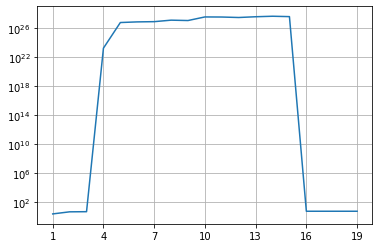

In [63]:
ns = np.arange(1,20)
N = 19

xs = np.linspace(a,b,N)
ys = func(xs)
np.random.seed(2)
errs = np.random.normal(scale=0.5,size=N)
ys += errs
fs = [lambda x: x*3]

for i in range(N-1):
    if i%2:
        fs.append(make_sin(i+2))
    else:
        fs.append(make_cos(i+3))

regress_errs_quad = [regress_err_quad(func,fs,xs,ys,n,a,b) for n in ns]
plt.semilogy(ns, regress_errs_quad)

plt.xticks(np.arange(1,20,3))
plt.grid()
ax = plt.gca()

O que você percebe?

Há uma região compreendendo nem tão, nem muito número de funções usadas, que faz o erro crescer muito. Usar menos funções, que tenham maior "peso" na regressão, ou usar todas dão um bom resultado. Quando usado uma quantidade intermediária, o resultado é ruim. 